In [1]:
# Using pd.to_datetime()


import pandas as pd

# Sample DataFrame
data = {'Date': ['2024-06-27 14:45:00', '2024-06-28 15:30:00', '2024-06-29 16:15:00']}
df = pd.DataFrame(data)

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')

# Print the DataFrame
print(df)
print(df['Date'].dtype)


                 Date
0 2024-06-27 14:45:00
1 2024-06-28 15:30:00
2 2024-06-29 16:15:00
datetime64[ns]


In [2]:
# Using set_index()

import pandas as pd

# Sample DataFrame
data = {'Date': ['2024-06-27 14:45:00', '2024-06-28 15:30:00', '2024-06-29 16:15:00'],
        'Value': [10, 20, 30]}
df = pd.DataFrame(data)

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Print the DataFrame
print(df)


                     Value
Date                      
2024-06-27 14:45:00     10
2024-06-28 15:30:00     20
2024-06-29 16:15:00     30


In [3]:
# df.reset_index()

import pandas as pd

# Sample DataFrame with a custom index
data = {'Value': [10, 20, 30, 40]}
dates = pd.date_range('2024-06-27', periods=4)
df = pd.DataFrame(data, index=dates)

print("Original DataFrame:")
print(df)

# Reset the index
df_reset = df.reset_index()

print("\nDataFrame after resetting index:")
print(df_reset)


Original DataFrame:
            Value
2024-06-27     10
2024-06-28     20
2024-06-29     30
2024-06-30     40

DataFrame after resetting index:
       index  Value
0 2024-06-27     10
1 2024-06-28     20
2 2024-06-29     30
3 2024-06-30     40


Explanation of the Example
    1. `Original DataFrame`: The DataFrame df has a DateTime index.
    2. `df.reset_index()`: This method resets the index of the DataFrame, converting the DateTime index into a column named 'index' and adding a default integer index.

In [4]:
df.reset_index(inplace=True)

print("\nOriginal DataFrame after resetting index in place:")
print(df)



Original DataFrame after resetting index in place:
       index  Value
0 2024-06-27     10
1 2024-06-28     20
2 2024-06-29     30
3 2024-06-30     40


In [5]:
# df.dropna(inplace=True)
# removes rows or columns with missing values

import pandas as pd
import numpy as np

# Sample DataFrame with NaN values
data = {'A': [1, 2, np.nan, 4], 'B': [5, np.nan, np.nan, 8], 'C': [9, 10, 11, 12]}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Drop rows with NaN values
df.dropna(inplace=True)

print("\nDataFrame after dropping rows with NaN values:")
print(df)


Original DataFrame:
     A    B   C
0  1.0  5.0   9
1  2.0  NaN  10
2  NaN  NaN  11
3  4.0  8.0  12

DataFrame after dropping rows with NaN values:
     A    B   C
0  1.0  5.0   9
3  4.0  8.0  12


Additional Parameters

The `dropna()` method has several parameters that provide more control over how missing values are handled:
    1. `axis`: Determines if rows or columns are removed. `axis=0` (default) removes rows, and `axis=1` removes columns.
    2. `how`: Determines if a row or column is removed when having at least one NaN or all NaNs. `how='any'` (default) removes if any NaN is present, and `how='all'` removes only if all elements are NaN.
    3. `subset`: Specifies the columns to check for NaNs. Only rows with NaNs in these columns are considered.

In [6]:
# what is df.shift() doing?

import pandas as pd

# Sample DataFrame
data = {
    'Open': [100, 105, 102, 108, 110],
    'Adj Close': [104, 103, 106, 109, 112]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Calculate the 'Target' column
df['Target'] = df['Adj Close'] - df['Open']

print("\nDataFrame with 'Target' column:")
print(df)

# Shift the 'Target' column
df['Target'] = df['Target'].shift(-1)

print("\nDataFrame after shifting 'Target' column:")
print(df)


Original DataFrame:
   Open  Adj Close
0   100        104
1   105        103
2   102        106
3   108        109
4   110        112

DataFrame with 'Target' column:
   Open  Adj Close  Target
0   100        104       4
1   105        103      -2
2   102        106       4
3   108        109       1
4   110        112       2

DataFrame after shifting 'Target' column:
   Open  Adj Close  Target
0   100        104    -2.0
1   105        103     4.0
2   102        106     1.0
3   108        109     2.0
4   110        112     NaN


Explanation of the Output
    1. `Original DataFrame`: Contains 'Open' and 'Adj Close' columns.
    2. `DataFrame with 'Target' column`: The 'Target' column is added, showing the difference between 'Adj Close' and 'Open'.
    3. `DataFrame after shifting 'Target' column`: The 'Target' column is shifted upwards by one position. The last row in the 'Target' column is NaN because there is no next row to shift a value from.

In [8]:
# Scaler

# use 'pip install scikit-learn' rather than 'pip install sklearn'

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Sample DataFrame
data = {'A': [1, 2, 3, 4, 5],
        'B': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Initialize the MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = sc.fit_transform(df)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

# Print the scaled DataFrame
print(scaled_df)


      A     B
0  0.00  0.00
1  0.25  0.25
2  0.50  0.50
3  0.75  0.75
4  1.00  1.00


The values in column 'A' are scaled between 0 and 1 based on their original range (1 to 5).
The values in column 'B' are similarly scaled between 0 and 1 based on their original range (10 to 50).
Using MinMaxScaler is particularly useful when your data has features with different scales, and you want to ensure that all features contribute equally to the model's performance.

Explanation
    1. `Sample DataFrame`: We create a sample DataFrame with columns 'A' and 'B'.
    2. `Initialize MinMaxScaler`: We create an instance of MinMaxScaler with the desired feature range, which is (0, 1) by default.
    3. `Fit and Transform`: We use `fit_transform` to first fit the scaler on the data and then transform it. This method computes the minimum and maximum values for each feature and scales them to the specified range.
    4. `New DataFrame`: We create a new DataFrame from the scaled data, preserving the original column names.
    5. `Output`: We print the scaled DataFrame to see the normalized values. 

df = df[5::6]

Explanation:

    * Start at index 5 (which is row 6: A=5, B=105).
    * Then take every 6th row (so the next rows will be at indices 11 and 17).
    * 
Conclusion
The operation df = df[5::6] is useful for downsampling your DataFrame by selecting rows at regular intervals, starting from a specific offset.

In [9]:
import pandas as pd

data = {
    'A': range(20),
    'B': range(100, 120)
}

df = pd.DataFrame(data)
print(df)
print('\n')
df = df[5::6]
print(df)


     A    B
0    0  100
1    1  101
2    2  102
3    3  103
4    4  104
5    5  105
6    6  106
7    7  107
8    8  108
9    9  109
10  10  110
11  11  111
12  12  112
13  13  113
14  14  114
15  15  115
16  16  116
17  17  117
18  18  118
19  19  119


     A    B
5    5  105
11  11  111
17  17  117


In [24]:
import pandas as pd
import pandas_ta as ta

# Create a sample DataFrame
data = {
    'Date': pd.date_range(start='2024-01-01', periods=100, freq='D'),
    'Close': [i + (i * 0.01) for i in range(100)]  # Sample close prices
}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Calculate MACD
macd = df.ta.macd(close='Close', fast=12, slow=26, signal=9)
print(macd)

# macd5 = df.ta.macd(close='Close', fast=60, slow=130, signal=45)
# print(macd5)

# Add MACD columns to the DataFrame
df = pd.concat([df, macd], axis=1)
# df = df + macd
# df.dropna(axis=0, inplace=True)

# Print the DataFrame
print(df.tail())


            MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9
Date                                                  
2024-01-01           NaN            NaN            NaN
2024-01-02           NaN            NaN            NaN
2024-01-03           NaN            NaN            NaN
2024-01-04           NaN            NaN            NaN
2024-01-05           NaN            NaN            NaN
...                  ...            ...            ...
2024-04-05          7.07  -3.552714e-15           7.07
2024-04-06          7.07  -3.552714e-15           7.07
2024-04-07          7.07  -3.552714e-15           7.07
2024-04-08          7.07  -3.552714e-15           7.07
2024-04-09          7.07   7.993606e-15           7.07

[100 rows x 3 columns]
            Close  MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9
Date                                                         
2024-04-05  95.95          7.07  -3.552714e-15           7.07
2024-04-06  96.96          7.07  -3.552714e-15           7.07
2024-04-07  9

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-01-03  3853.290039  3878.459961  3794.330078  3824.139893  3824.139893   
2023-01-04  3840.360107  3873.159912  3815.770020  3852.969971  3852.969971   
2023-01-05  3839.739990  3839.739990  3802.419922  3808.100098  3808.100098   
2023-01-06  3823.370117  3906.189941  3809.560059  3895.080078  3895.080078   
2023-01-09  3910.820068  3950.570068  3890.419922  3892.090088  3892.090088   

                Volume  
Date                    
2023-01-03  3959140000  
2023-01-04  4414080000  
2023-01-05  3893450000  
2023-01-06  3923560000  
2023-01-09  4311770000  


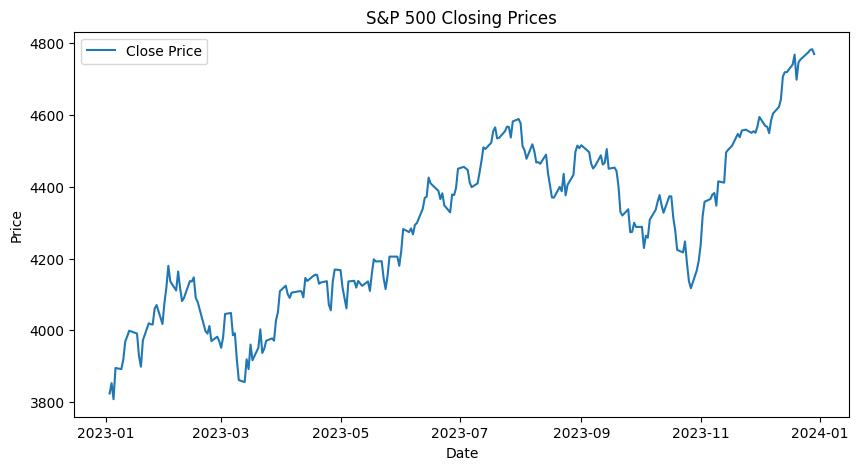

In [19]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker and date range
ticker = '^GSPC'
start_date = '2023-01-01'
end_date = '2023-12-31'

# Fetch data using yfinance
data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the data
print(data.head())

# Plot the closing prices
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Close Price')
plt.title('S&P 500 Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


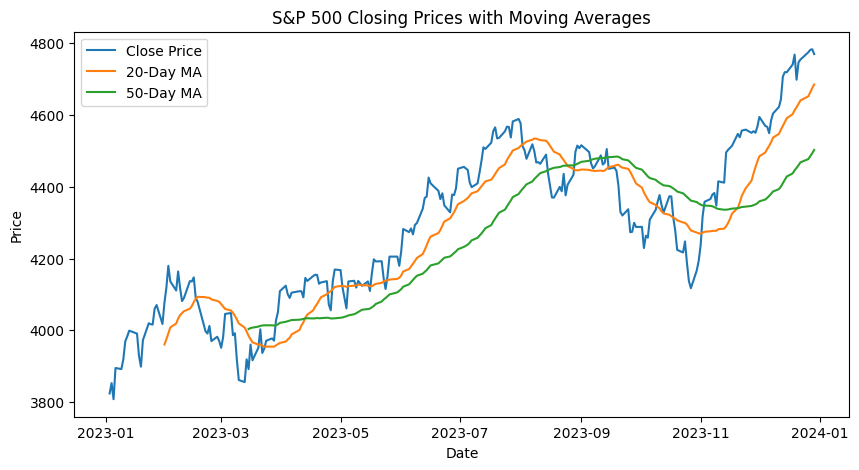

In [20]:
# Calculate 20-day and 50-day moving averages
data['20_MA'] = data['Close'].rolling(window=20).mean()
data['50_MA'] = data['Close'].rolling(window=50).mean()

# Plot the closing prices along with moving averages
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['20_MA'], label='20-Day MA')
plt.plot(data['50_MA'], label='50-Day MA')
plt.title('S&P 500 Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-01-03  3853.290039  3878.459961  3794.330078  3824.139893  3824.139893   
2023-01-04  3840.360107  3873.159912  3815.770020  3852.969971  3852.969971   
2023-01-05  3839.739990  3839.739990  3802.419922  3808.100098  3808.100098   
2023-01-06  3823.370117  3906.189941  3809.560059  3895.080078  3895.080078   
2023-01-09  3910.820068  3950.570068  3890.419922  3892.090088  3892.090088   

                Volume  
Date                    
2023-01-03  3959140000  
2023-01-04  4414080000  
2023-01-05  3893450000  
2023-01-06  3923560000  
2023-01-09  4311770000  


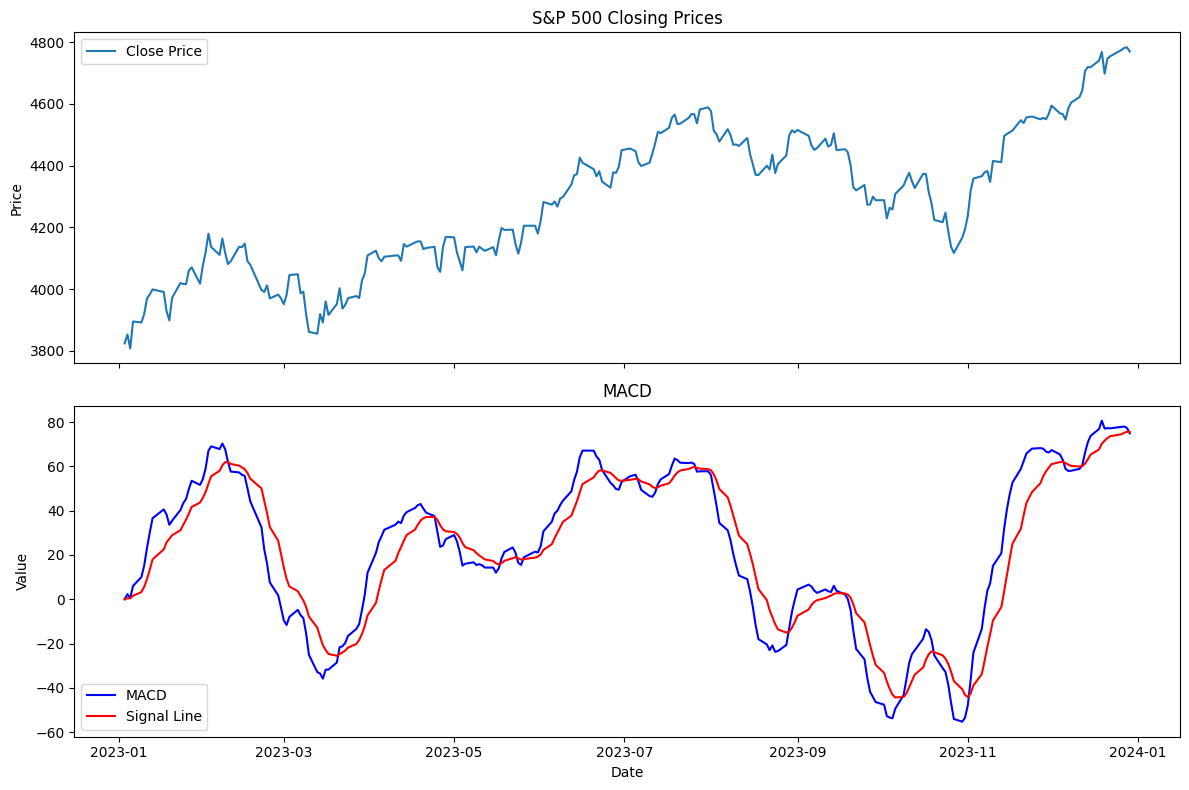

In [21]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the ticker and date range
ticker = '^GSPC'
start_date = '2023-01-01'
end_date = '2023-12-31'

# Fetch data using yfinance
data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the data
print(data.head())

# Calculate the short-term and long-term moving averages
short_ema = data['Close'].ewm(span=12, adjust=False).mean()  # 12-day EMA
long_ema = data['Close'].ewm(span=26, adjust=False).mean()  # 26-day EMA

# Calculate the MACD line
macd = short_ema - long_ema

# Calculate the Signal line
signal = macd.ewm(span=9, adjust=False).mean()

# Add MACD and Signal line to the DataFrame
data['MACD'] = macd
data['Signal'] = signal

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 8))

# Plot the closing prices
ax1.plot(data['Close'], label='Close Price')
ax1.set_title('S&P 500 Closing Prices')
ax1.set_ylabel('Price')
ax1.legend()

# Plot the MACD and Signal line
ax2.plot(data['MACD'], label='MACD', color='blue')
ax2.plot(data['Signal'], label='Signal Line', color='red')
ax2.set_title('MACD')
ax2.set_xlabel('Date')
ax2.set_ylabel('Value')
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-01-03  3853.290039  3878.459961  3794.330078  3824.139893  3824.139893   
2023-01-04  3840.360107  3873.159912  3815.770020  3852.969971  3852.969971   
2023-01-05  3839.739990  3839.739990  3802.419922  3808.100098  3808.100098   
2023-01-06  3823.370117  3906.189941  3809.560059  3895.080078  3895.080078   
2023-01-09  3910.820068  3950.570068  3890.419922  3892.090088  3892.090088   

                Volume  
Date                    
2023-01-03  3959140000  
2023-01-04  4414080000  
2023-01-05  3893450000  
2023-01-06  3923560000  
2023-01-09  4311770000  


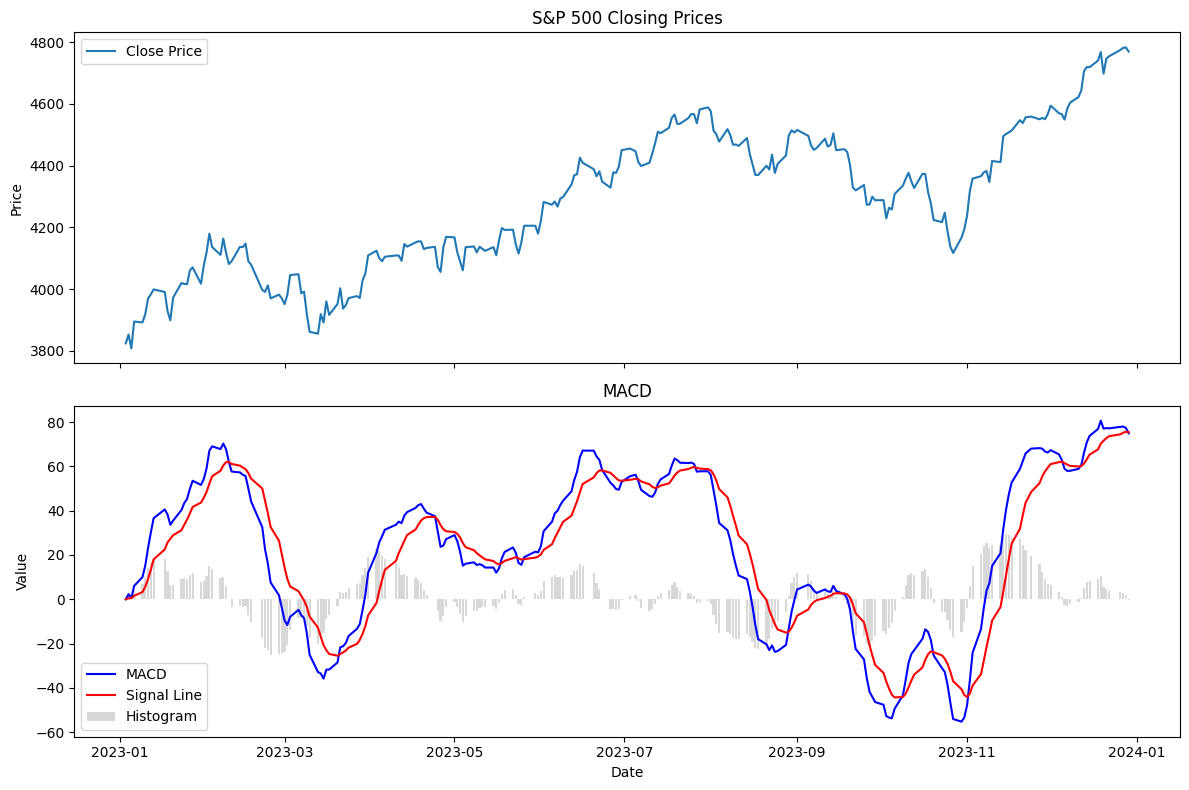

In [22]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the ticker and date range
ticker = '^GSPC'
start_date = '2023-01-01'
end_date = '2023-12-31'

# Fetch data using yfinance
data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the data
print(data.head())

# Calculate the short-term and long-term moving averages
short_ema = data['Close'].ewm(span=12, adjust=False).mean()  # 12-day EMA
long_ema = data['Close'].ewm(span=26, adjust=False).mean()  # 26-day EMA

# Calculate the MACD line
macd = short_ema - long_ema

# Calculate the Signal line
signal = macd.ewm(span=9, adjust=False).mean()

# Calculate the MACD histogram
histogram = macd - signal

# Add MACD, Signal line, and histogram to the DataFrame
data['MACD'] = macd
data['Signal'] = signal
data['Histogram'] = histogram

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 8))

# Plot the closing prices
ax1.plot(data['Close'], label='Close Price')
ax1.set_title('S&P 500 Closing Prices')
ax1.set_ylabel('Price')
ax1.legend()

# Plot the MACD, Signal line, and histogram
ax2.plot(data['MACD'], label='MACD', color='blue')
ax2.plot(data['Signal'], label='Signal Line', color='red')
ax2.bar(data.index, data['Histogram'], label='Histogram', color='gray', alpha=0.3)
ax2.set_title('MACD')
ax2.set_xlabel('Date')
ax2.set_ylabel('Value')
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-01-03  3853.290039  3878.459961  3794.330078  3824.139893  3824.139893   
2023-01-04  3840.360107  3873.159912  3815.770020  3852.969971  3852.969971   
2023-01-05  3839.739990  3839.739990  3802.419922  3808.100098  3808.100098   
2023-01-06  3823.370117  3906.189941  3809.560059  3895.080078  3895.080078   
2023-01-09  3910.820068  3950.570068  3890.419922  3892.090088  3892.090088   

                Volume  
Date                    
2023-01-03  3959140000  
2023-01-04  4414080000  
2023-01-05  3893450000  
2023-01-06  3923560000  
2023-01-09  4311770000  


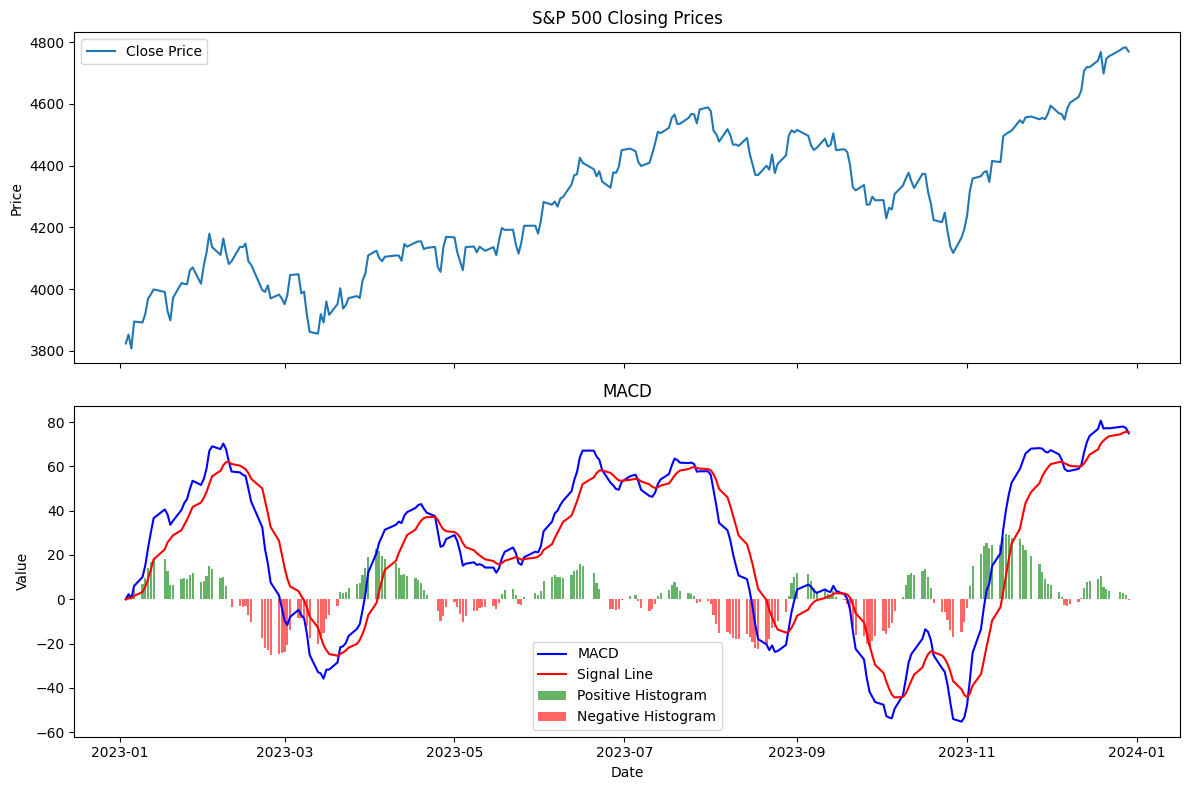

In [23]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the ticker and date range
ticker = '^GSPC'
start_date = '2023-01-01'
end_date = '2023-12-31'

# Fetch data using yfinance
data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the data
print(data.head())

# Calculate the short-term and long-term moving averages
short_ema = data['Close'].ewm(span=12, adjust=False).mean()  # 12-day EMA
long_ema = data['Close'].ewm(span=26, adjust=False).mean()  # 26-day EMA

# Calculate the MACD line
macd = short_ema - long_ema

# Calculate the Signal line
signal = macd.ewm(span=9, adjust=False).mean()

# Calculate the MACD histogram
histogram = macd - signal

# Add MACD, Signal line, and histogram to the DataFrame
data['MACD'] = macd
data['Signal'] = signal
data['Histogram'] = histogram

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 8))

# Plot the closing prices
ax1.plot(data['Close'], label='Close Price')
ax1.set_title('S&P 500 Closing Prices')
ax1.set_ylabel('Price')
ax1.legend()

# Plot the MACD and Signal line
ax2.plot(data['MACD'], label='MACD', color='blue')
ax2.plot(data['Signal'], label='Signal Line', color='red')

# Plot the MACD histogram with colors
pos_histogram = data['Histogram'].where(data['Histogram'] > 0)
neg_histogram = data['Histogram'].where(data['Histogram'] <= 0)
ax2.bar(data.index, pos_histogram, label='Positive Histogram', color='green', alpha=0.6)
ax2.bar(data.index, neg_histogram, label='Negative Histogram', color='red', alpha=0.6)

ax2.set_title('MACD')
ax2.set_xlabel('Date')
ax2.set_ylabel('Value')
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


[*********************100%%**********************]  1 of 1 completed


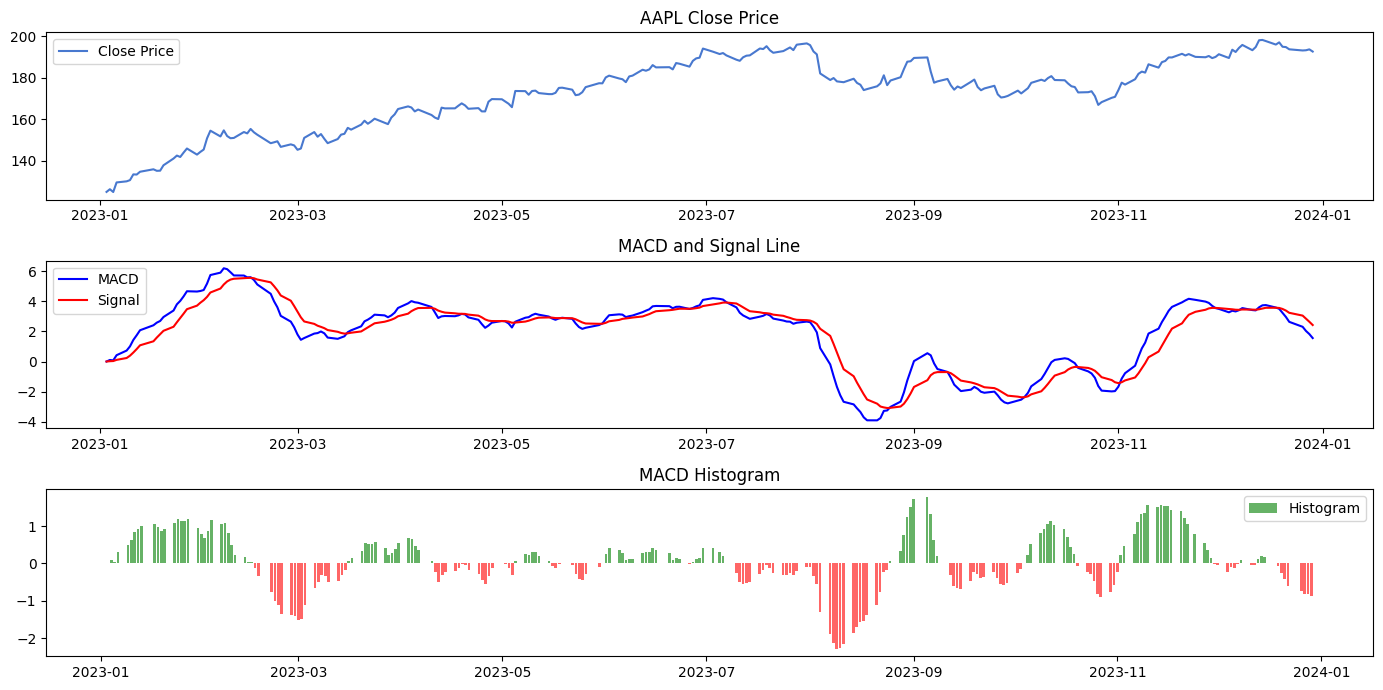

In [63]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch data using yfinance
ticker = 'AAPL'
start_date = '2023-01-01'
end_date = '2023-12-31'

df = yf.download(ticker, start=start_date, end=end_date)

# Calculate the EMAs
exp1 = df['Close'].ewm(span=12, adjust=False).mean()
exp2 = df['Close'].ewm(span=26, adjust=False).mean()

# Calculate the MACD
macd = exp1 - exp2

# Calculate the Signal line
signal = macd.ewm(span=9, adjust=False).mean()

# Add MACD and Signal to the DataFrame
df['MACD'] = macd
df['Signal'] = signal

# Calculate the MACD Histogram
df['Histogram'] = df['MACD'] - df['Signal']

# Plotting
plt.figure(figsize=(14, 7))

# Plot the closing price
plt.subplot(3, 1, 1)
plt.plot(df['Close'], label='Close Price')
plt.title('AAPL Close Price')
plt.legend()

# Plot the MACD and Signal line
plt.subplot(3, 1, 2)
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['Signal'], label='Signal', color='red')
plt.title('MACD and Signal Line')
plt.legend()

# Plot the MACD Histogram
plt.subplot(3, 1, 3)
plt.bar(df.index, df['Histogram'], label='Histogram', color=['green' if val >= 0 else 'red' for val in df['Histogram']], alpha=0.6)
plt.title('MACD Histogram')
plt.legend()

plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed


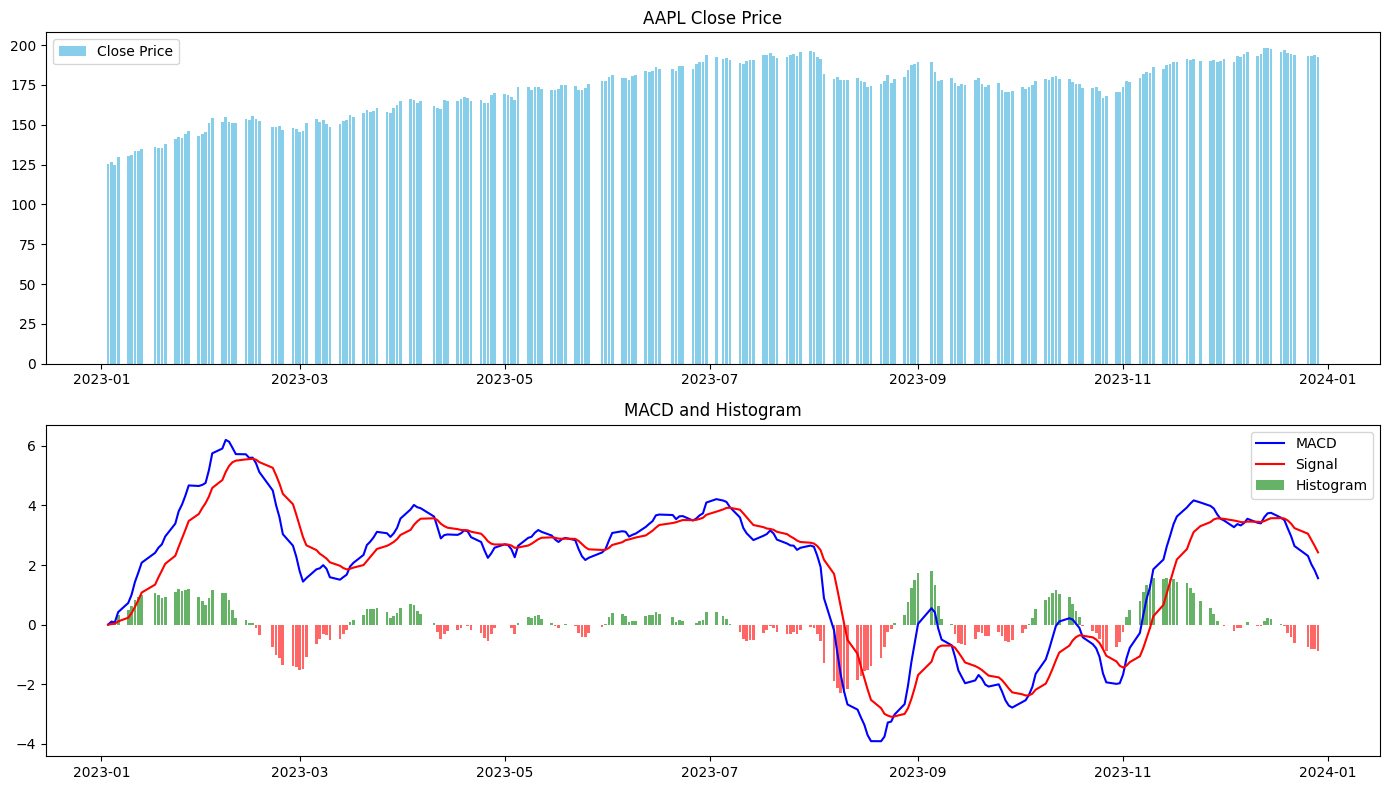

In [64]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch data using yfinance
ticker = 'AAPL'
start_date = '2023-01-01'
end_date = '2023-12-31'

df = yf.download(ticker, start=start_date, end=end_date)

# Calculate the EMAs
exp1 = df['Close'].ewm(span=12, adjust=False).mean()
exp2 = df['Close'].ewm(span=26, adjust=False).mean()

# Calculate the MACD
macd = exp1 - exp2

# Calculate the Signal line
signal = macd.ewm(span=9, adjust=False).mean()

# Add MACD and Signal to the DataFrame
df['MACD'] = macd
df['Signal'] = signal

# Calculate the MACD Histogram
df['Histogram'] = df['MACD'] - df['Signal']

# Plotting
plt.figure(figsize=(14, 8))

# Plot the closing price as bars
plt.subplot(2, 1, 1)
plt.bar(df.index, df['Close'], label='Close Price', color='skyblue')
plt.title('AAPL Close Price')
plt.legend()

# Plot the MACD, Signal line, and Histogram together
plt.subplot(2, 1, 2)
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['Signal'], label='Signal', color='red')
plt.bar(df.index, df['Histogram'], label='Histogram', color=['green' if val >= 0 else 'red' for val in df['Histogram']], alpha=0.6)
plt.title('MACD and Histogram')
plt.legend()

plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed


AttributeError: 'NoneType' object has no attribute 'suptitle'

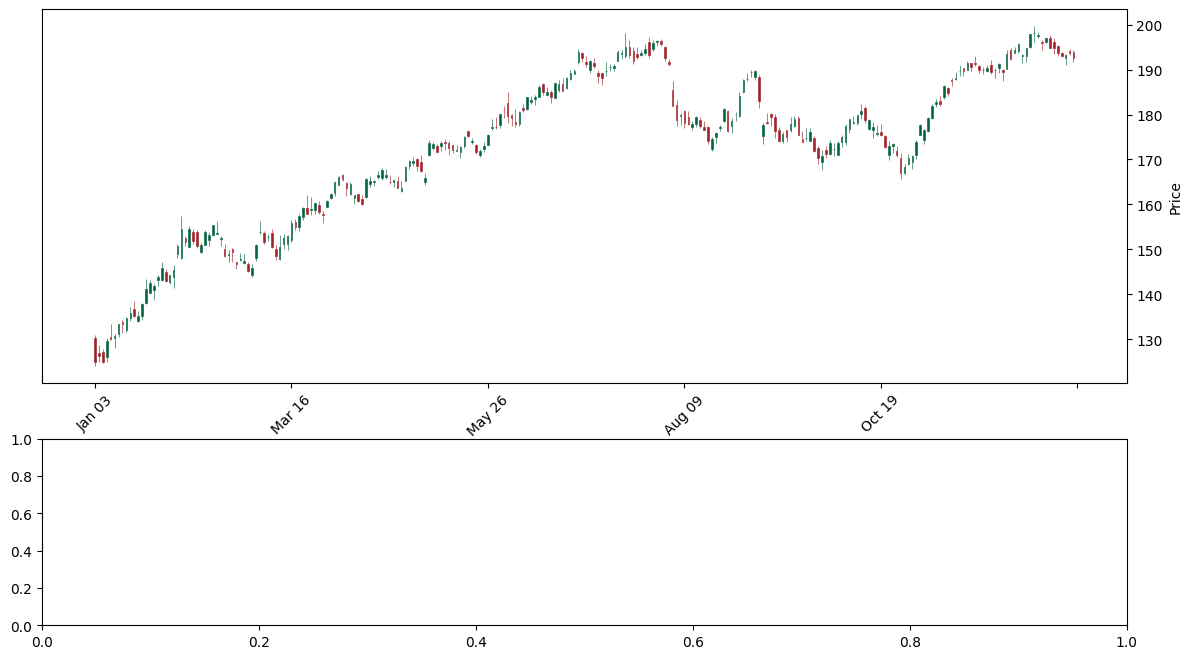

In [66]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

# Fetch data using yfinance
ticker = 'AAPL'
start_date = '2023-01-01'
end_date = '2023-12-31'

df = yf.download(ticker, start=start_date, end=end_date)

# Calculate the EMAs
exp1 = df['Close'].ewm(span=12, adjust=False).mean()
exp2 = df['Close'].ewm(span=26, adjust=False).mean()

# Calculate the MACD
macd = exp1 - exp2

# Calculate the Signal line
signal = macd.ewm(span=9, adjust=False).mean()

# Add MACD and Signal to the DataFrame
df['MACD'] = macd
df['Signal'] = signal

# Calculate the MACD Histogram
df['Histogram'] = df['MACD'] - df['Signal']

# Prepare the candlestick data
df.index.name = 'Date'  # Set the index name to 'Date' for mplfinance compatibility

# Plotting with mplfinance and matplotlib
fig, axes = plt.subplots(2, 1, figsize=(14, 8), gridspec_kw={'height_ratios': [2, 1]})

# Plot the candlestick chart using mplfinance
mpf.plot(df, type='candle', ax=axes[0], style='charles', title='AAPL Candlestick Chart', ylabel='Price')

# Plot the MACD, Signal line, and Histogram together
axes[1].plot(df['MACD'], label='MACD', color='blue')
axes[1].plot(df['Signal'], label='Signal', color='red')
axes[1].bar(df.index, df['Histogram'], label='Histogram', color=['green' if val >= 0 else 'red' for val in df['Histogram']], alpha=0.6)
axes[1].set_title('MACD and Histogram')
axes[1].legend()

plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed


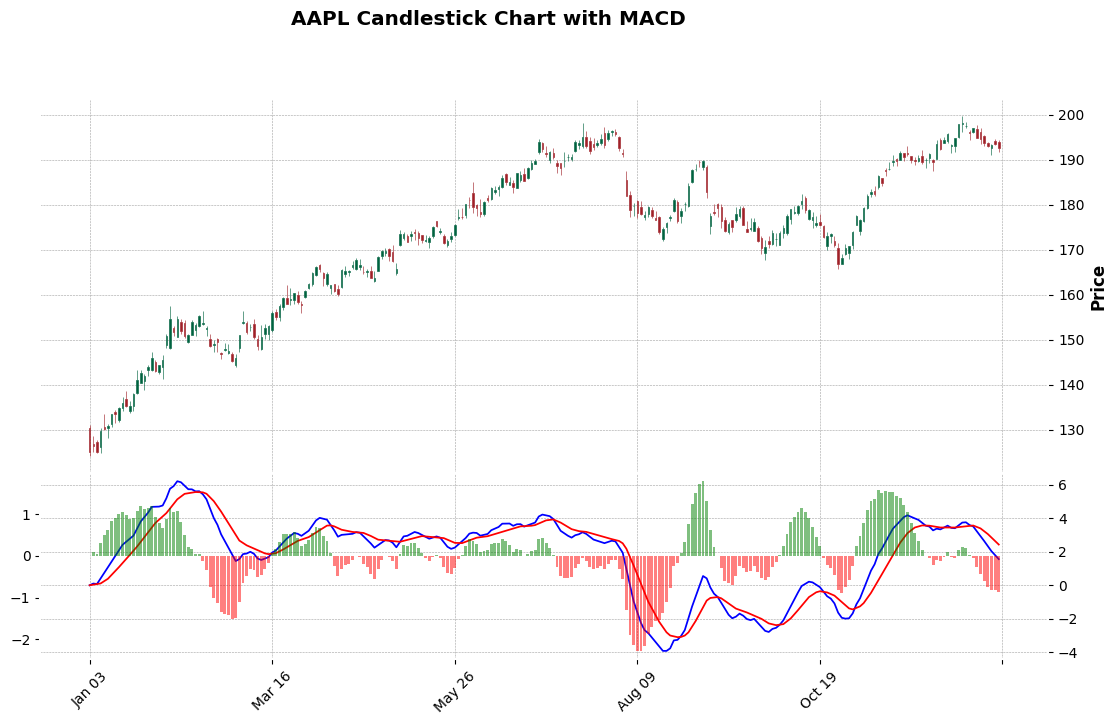

In [67]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

# Fetch data using yfinance
ticker = 'AAPL'
start_date = '2023-01-01'
end_date = '2023-12-31'

df = yf.download(ticker, start=start_date, end=end_date)

# Calculate the EMAs
exp1 = df['Close'].ewm(span=12, adjust=False).mean()
exp2 = df['Close'].ewm(span=26, adjust=False).mean()

# Calculate the MACD
macd = exp1 - exp2

# Calculate the Signal line
signal = macd.ewm(span=9, adjust=False).mean()

# Calculate the MACD Histogram
histogram = macd - signal

# Prepare the data for mplfinance
df['MACD'] = macd
df['Signal'] = signal
df['Histogram'] = histogram
df.index.name = 'Date'  # Set the index name to 'Date' for mplfinance compatibility

# Create the MACD panel
apds = [
    mpf.make_addplot(df['MACD'], panel=1, color='blue', secondary_y=False),
    mpf.make_addplot(df['Signal'], panel=1, color='red', secondary_y=False),
    mpf.make_addplot(df['Histogram'], type='bar', panel=1, color=['green' if val >= 0 else 'red' for val in df['Histogram']], secondary_y=True, alpha=0.5)
]

# Plotting with mplfinance
mpf.plot(df, type='candle', style='charles', addplot=apds, title='AAPL Candlestick Chart with MACD', ylabel='Price', volume=False, panel_ratios=(2,1), figsize=(14, 8))


[*********************100%%**********************]  1 of 1 completed


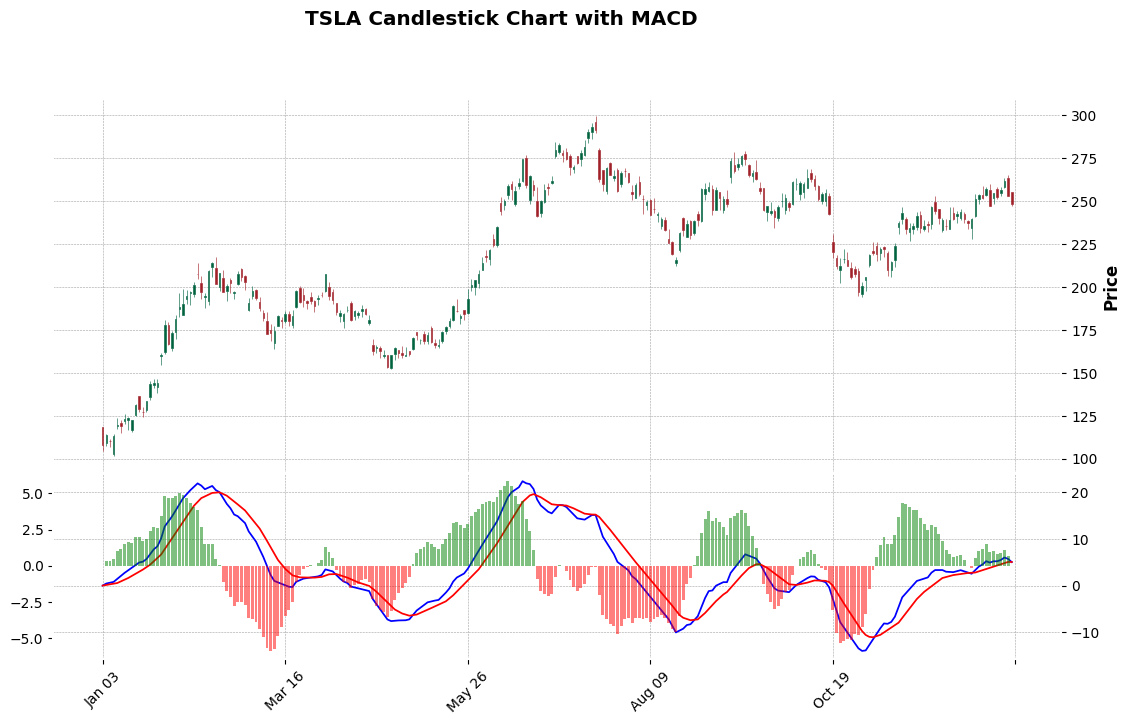

In [69]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

def calculate_macd(df):
    # Calculate the EMAs
    exp1 = df['Close'].ewm(span=12, adjust=False).mean()
    exp2 = df['Close'].ewm(span=26, adjust=False).mean()

    # Calculate the MACD
    macd = exp1 - exp2

    # Calculate the Signal line
    signal = macd.ewm(span=9, adjust=False).mean()

    # Calculate the MACD Histogram
    histogram = macd - signal

    # Add MACD, Signal, and Histogram to the DataFrame
    df['MACD'] = macd
    df['Signal'] = signal
    df['Histogram'] = histogram

    return df

def plot_candlestick_with_macd(ticker, start_date, end_date):
    # Fetch data using yfinance
    df = yf.download(ticker, start=start_date, end=end_date)
    df.index.name = 'Date'  # Set the index name to 'Date' for mplfinance compatibility

    # Calculate MACD
    df = calculate_macd(df)

    # Create the MACD panel
    apds = [
        mpf.make_addplot(df['MACD'], panel=1, color='blue', secondary_y=False),
        mpf.make_addplot(df['Signal'], panel=1, color='red', secondary_y=False),
        mpf.make_addplot(df['Histogram'], type='bar', panel=1, color=['green' if val >= 0 else 'red' for val in df['Histogram']], secondary_y=True, alpha=0.5)
    ]

    # Plotting with mplfinance
    mpf.plot(df, type='candle', style='charles', addplot=apds, title=f'{ticker} Candlestick Chart with MACD', ylabel='Price', volume=False, panel_ratios=(2,1), figsize=(14, 8))

# Example usage
plot_candlestick_with_macd('TSLA', '2023-01-01', '2023-12-31')
